<a href="https://colab.research.google.com/github/anurag01111/Breast-cancer-detection/blob/main/facebook_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('./dataset_Facebook.csv',sep=';')

In [ ]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
data.iloc[:5,:5]

,Page total likes,Type,Category,Post Month,Post Weekday
0,139441,Photo,2,12,4
1,139441,Status,2,12,3
2,139441,Photo,3,12,3
3,139441,Photo,2,12,2
4,139441,Photo,2,12,2


In [ ]:
data.isnull()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

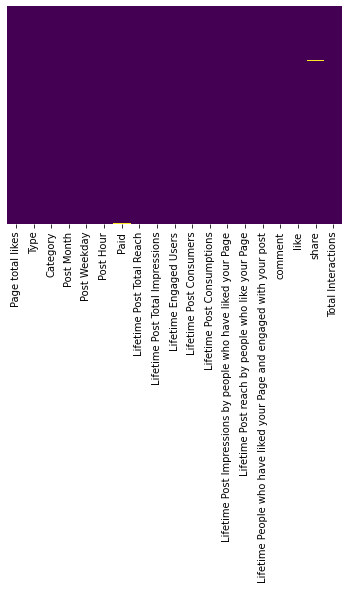

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Category', ylabel='count'>

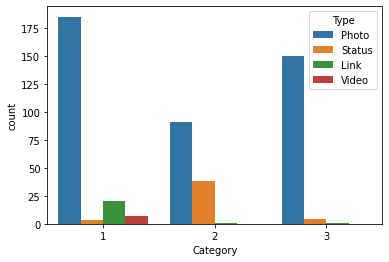

In [ ]:
sns.countplot(x='Category',hue='Type',data=data,)

<Axes: xlabel='Category', ylabel='count'>

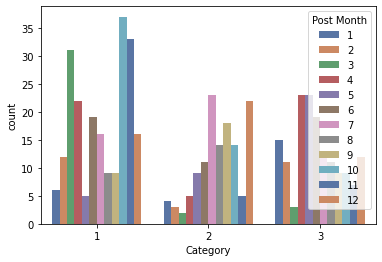

In [ ]:
sns.countplot(x='Category',hue='Post Month',data=data,palette='deep')

<Axes: >

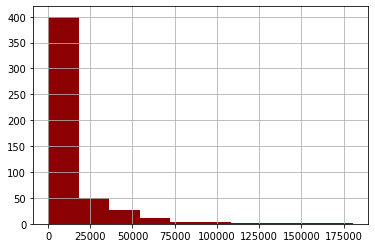

In [ ]:
data['Lifetime Post Total Reach'].hist(bins=10,color='darkred')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [ ]:
data['Category'].value_counts()

1    215
3    155
2    130
Name: Category, dtype: int64

In [ ]:
data['Post Month'].value_counts()

10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Post Month, dtype: int64

#PCA

In [ ]:
categorical_data = ['Type','Category','Post Month',	'Post Weekday',	'Post Hour','Paid']

In [ ]:
data_pca = data.drop(columns=categorical_data)

<Axes: >

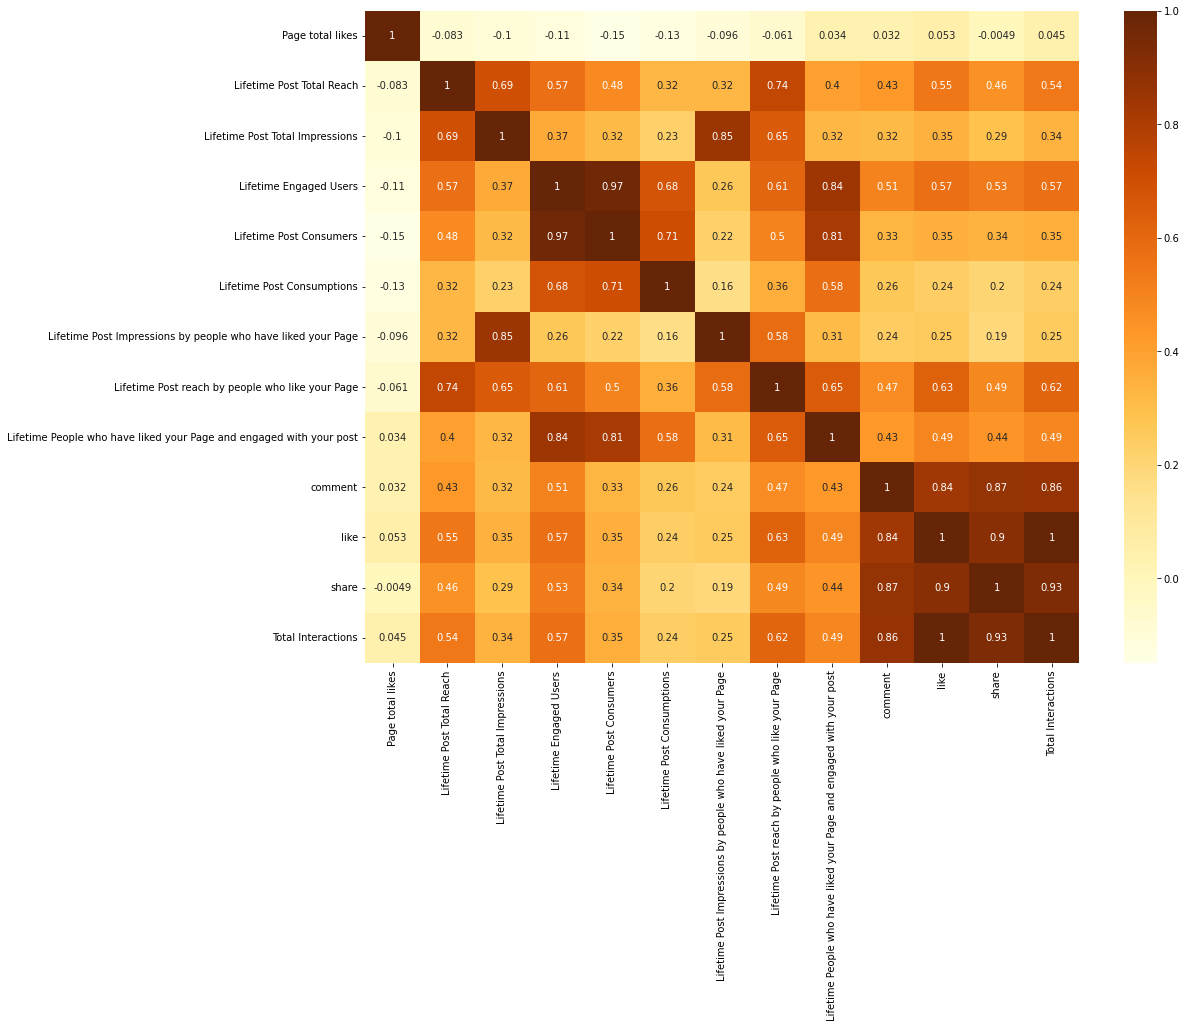

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data_pca.corr(),annot=True,cbar=True,cmap='YlOrBr')

In [ ]:
scaler = StandardScaler()
scaler.fit(data_pca)
data_std = pd.DataFrame( scaler.transform(data_pca),columns=data_pca.columns)

<Axes: >

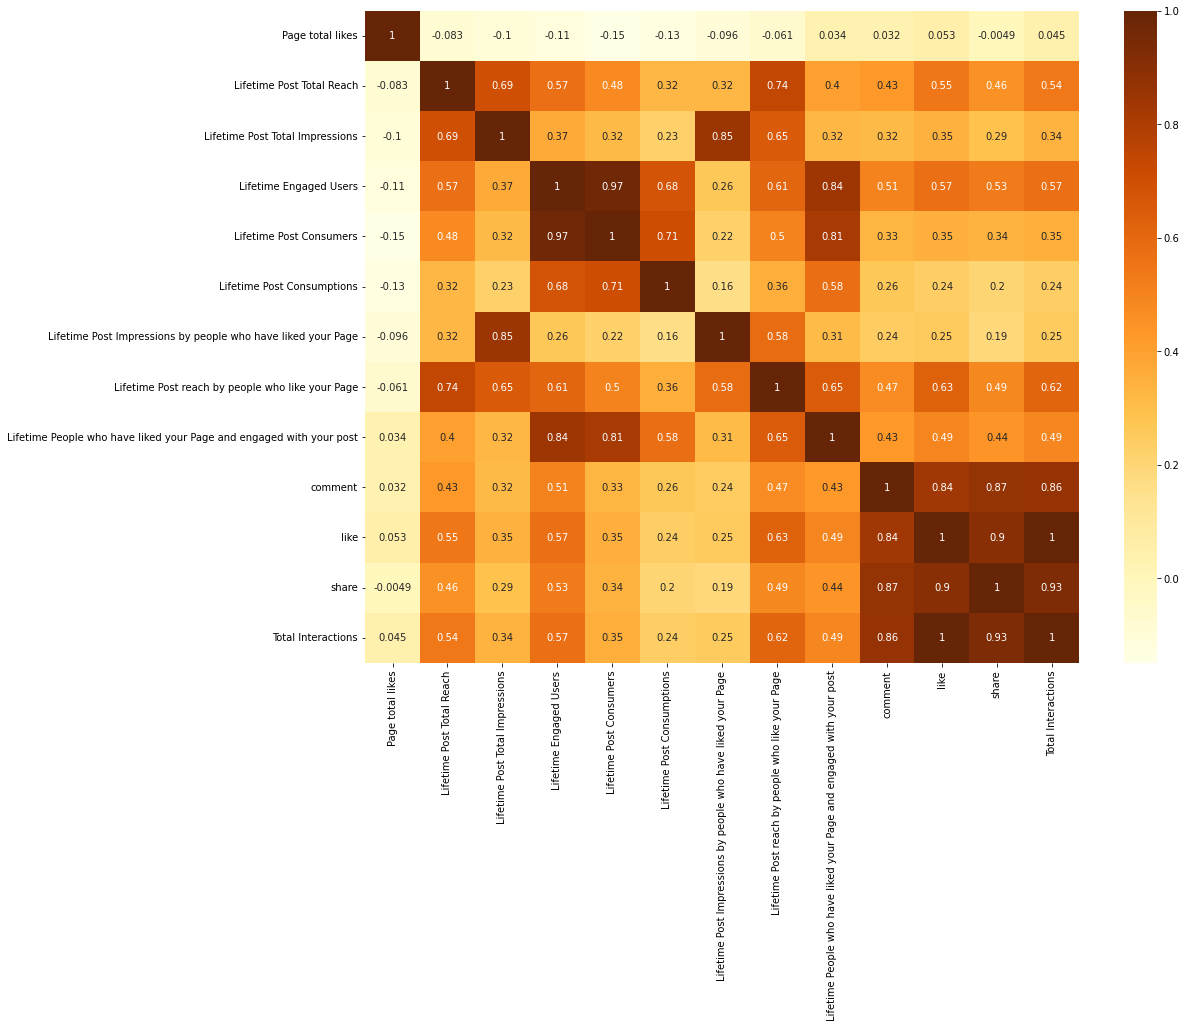

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data_std.corr(),annot=True,cbar=True,cmap='YlOrBr')

In [ ]:
e_values , e_vectors = np.linalg.eig(data_std.cov().values)

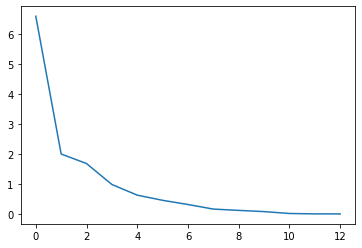

In [ ]:
plt.plot(sorted(e_values,reverse=True))

In [ ]:
np.sum(e_values[:7])/np.sum(e_values)

0.9717832602619733

#PRE PROCESSING

In [ ]:
data.dropna(inplace=True)

#Regression

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest

#Preprocessing for Regression

In [ ]:
outlier=np.percentile(data['Lifetime Post Total Reach'],90)
outlier

37260.8

In [ ]:
df = data[data['Lifetime Post Total Reach']

SyntaxError: ignored

In [ ]:
def Weekday(x):
    if x == 1:
        return 'Sunday'
    elif x== 2:
        return 'Monday'
    elif x == 3:
        return 'Tuesday'
    elif x == 4:
        return 'Wednesday'
    elif x == 5:
        return 'Thursday'
    elif x ==6:
        return 'Friday'
    elif x == 7:
        return "Saturday"

data['Weekday'] = data['Post Weekday'].apply(lambda x: Weekday(x))

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Weekday'])],axis=1)

NameError: ignored

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Post Hour'],prefix='hour')],axis=1)
df = pd.concat([df,pd.get_dummies(df['Post Month'],prefix='Month')],axis=1)
df['Video'] = pd.get_dummies(df['Type'])['Video']
df['Status'] = pd.get_dummies(df['Type'])['Status']
df['Photo'] = pd.get_dummies(df['Type'])['Photo']
df['Category_1'] = pd.get_dummies(df['Category'])[1]
df['Category_2'] = pd.get_dummies(df['Category'])[2]

NameError: ignored

#EDA

<Axes: >

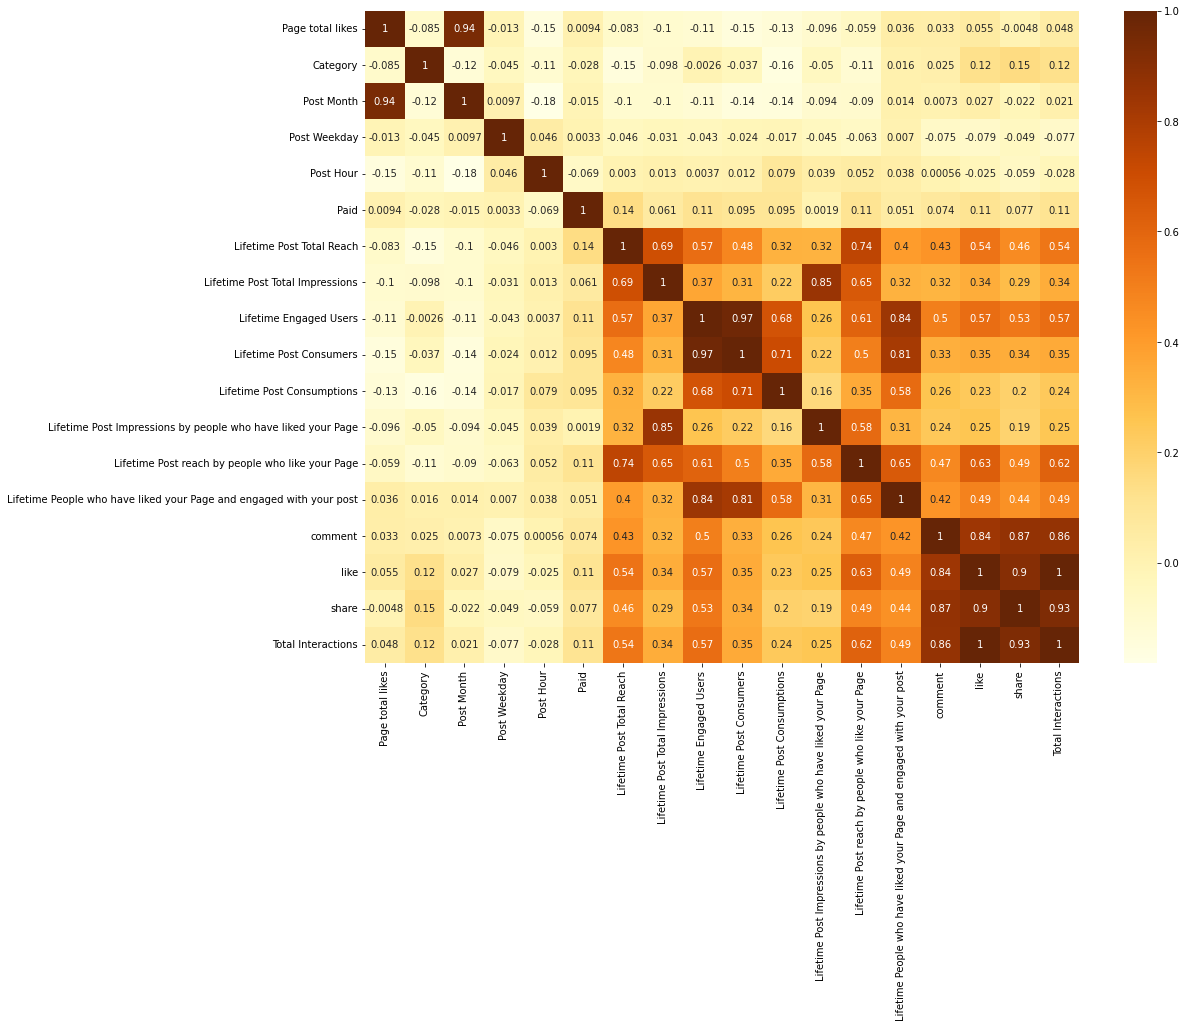

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,cbar=True,cmap='YlOrBr')
     

<ipython-input-67-dd26b3035c1a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Page total likes'],bins=20,kde=True,color="black")


Text(0.5, 1.0, 'Page total likes')

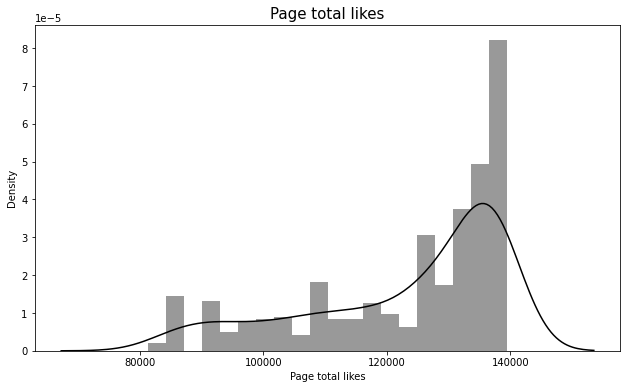

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['Page total likes'],bins=20,kde=True,color="black")
# plt.xlim([6000,14000])
plt.title("Page total likes",fontsize=15)
     

<ipython-input-68-7383435df19e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['like'],bins=100,color='black',kde=True)


Text(0.5, 1.0, 'Like - Post')

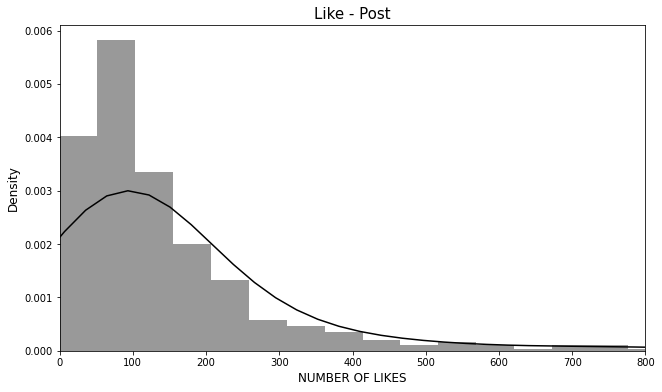

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['like'],bins=100,color='black',kde=True)
plt.xlim(0,800)
plt.xlabel("NUMBER OF LIKES",fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.title('Like - Post',fontsize=15)
     

<ipython-input-69-c526363965f1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Lifetime Engaged Users'],bins=100,color='black')


Text(0.5, 1.0, 'Lifetime engaged users')

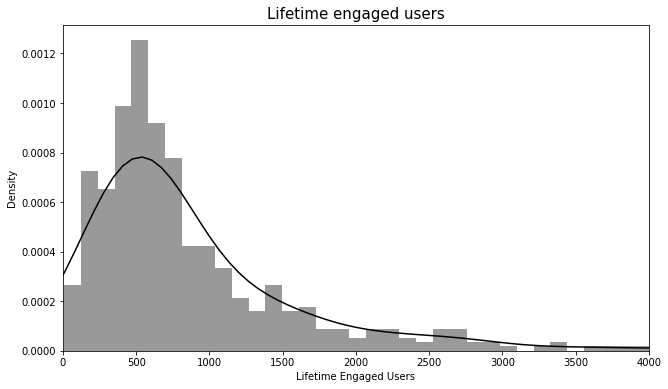

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['Lifetime Engaged Users'],bins=100,color='black')
plt.xlim(0,4000)
plt.title('Lifetime engaged users',fontsize=15)

<ipython-input-70-614c7488a561>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Lifetime Post Total Reach'],bins=200,color='black')


(0.0, 100000.0)

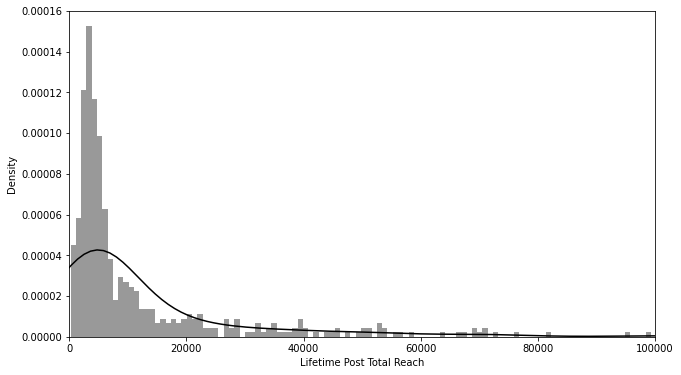

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['Lifetime Post Total Reach'],bins=200,color='black')
plt.xlim(0,100000)

Text(0.5, 0.98, 'Engagement Metrics vs. Lifetime Engaged Users')

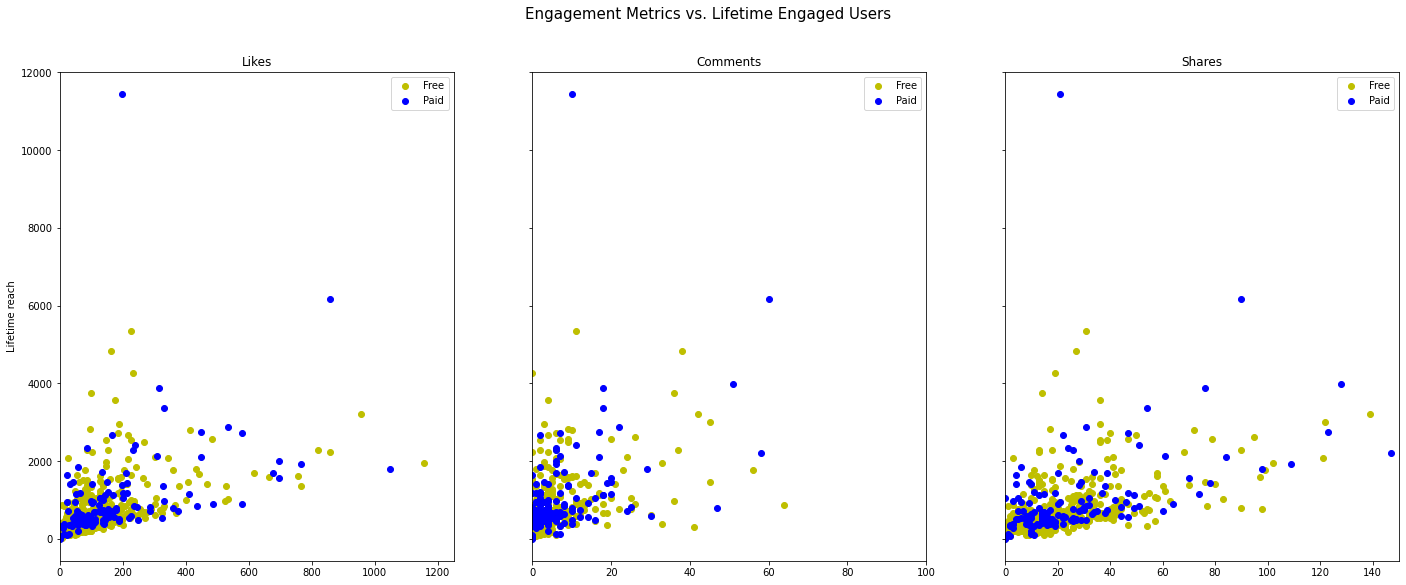

In [ ]:
fig, ax = plt.subplots(ncols=3,nrows=1,sharey=True,figsize=(24,9))

paid = data[data['Paid']==1]
free = data[data['Paid']==0]

ax[0].scatter(free['like'],free['Lifetime Engaged Users'],color='y')
ax[0].scatter(paid['like'],paid['Lifetime Engaged Users'],color='b')
ax[0].set_title('Likes')
ax[0].set_xlim(0,1250)
ax[0].legend(labels=['Free','Paid'])

ax[1].scatter(free['comment'],free['Lifetime Engaged Users'],color='y')
ax[1].scatter(paid['comment'],paid['Lifetime Engaged Users'],color='b')
ax[1].set_title('Comments')
ax[1].set_xlim(0,100)
ax[1].legend(labels=['Free','Paid'])

ax[2].scatter(free['share'],free['Lifetime Engaged Users'],color='y')
ax[2].scatter(paid['share'],paid['Lifetime Engaged Users'],color='b')
ax[2].set_title('Shares')
ax[2].set_xlim(0,150)
ax[2].legend(labels=['Free','Paid'])

ax[0].set_ylabel("Lifetime reach")

fig.suptitle('Engagement Metrics vs. Lifetime Engaged Users',fontsize=15)

(0.0, 3000.0)

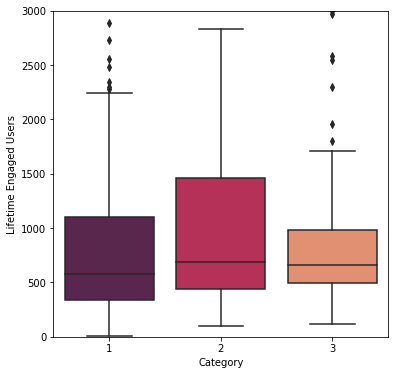

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x=data['Category'],y=data['Lifetime Engaged Users'],palette='rocket')
plt.ylim(0,3000)
     

(0.0, 5000.0)

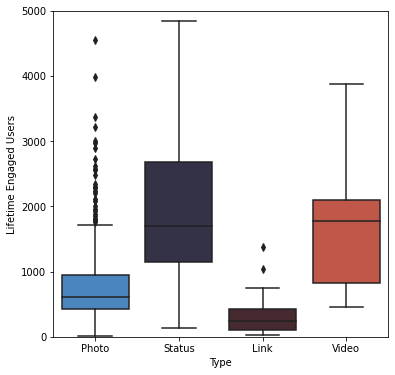

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x=data['Type'],y=data['Lifetime Engaged Users'],palette='icefire')
plt.ylim(0,5000)

(0.0, 5000.0)

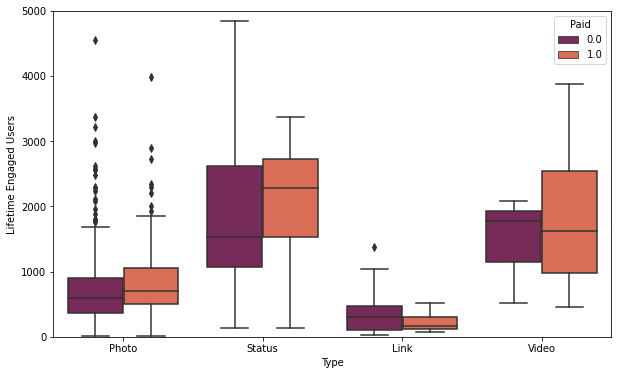

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Type'],y=data['Lifetime Engaged Users'],hue=data['Paid'],palette='rocket')
plt.ylim(0,5000)
     

(-300.0, 6500.0)

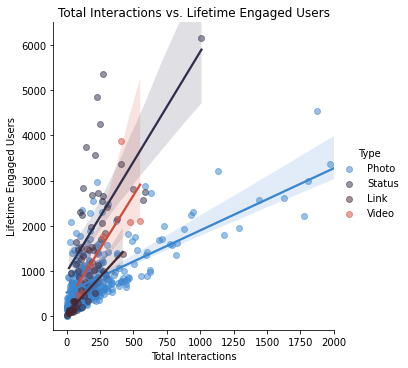

In [ ]:
sns.lmplot(x='Total Interactions',y='Lifetime Engaged Users',
           hue='Type',data=data,scatter_kws= {'alpha':0.5},palette='icefire')
plt.title('Total Interactions vs. Lifetime Engaged Users')
plt.xlim(-100,2000)
plt.ylim(-300,6500)
     

(-300.0, 6000.0)

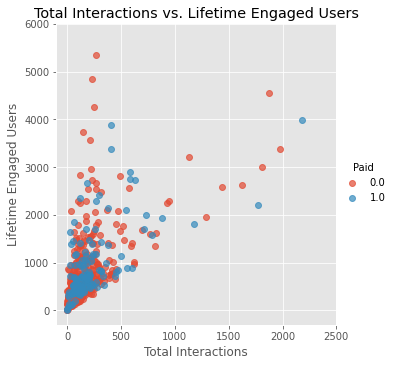

In [ ]:
plt.style.use('ggplot')
sns.lmplot(x='Total Interactions',y='Lifetime Engaged Users',
           hue='Paid',data=data,fit_reg=False,scatter_kws= {'alpha':0.7})
plt.title('Total Interactions vs. Lifetime Engaged Users')
plt.xlim(-100,2500)
plt.ylim(-300,6000)

(-300.0, 6500.0)

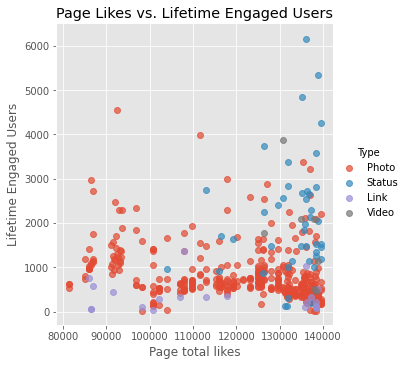

In [ ]:
plt.style.use('ggplot')
sns.lmplot(x='Page total likes',y='Lifetime Engaged Users',
           hue='Type',data=data,fit_reg=False,scatter_kws= {'alpha':0.7},)
plt.title('Page Likes vs. Lifetime Engaged Users')
# plt.xlim(-100,140000)
plt.ylim(-300,6500)
     

(0.0, 2300.0)

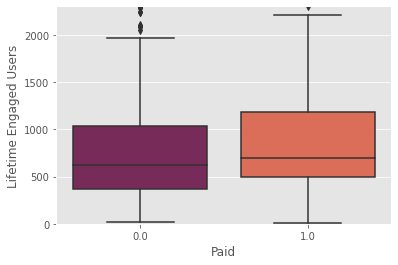

In [ ]:
sns.boxplot(x=data['Paid'],y=data['Lifetime Engaged Users'],palette='rocket')
plt.ylim(0,2300)

Text(0.5, 1.0, 'Post Engagement by Weekday')

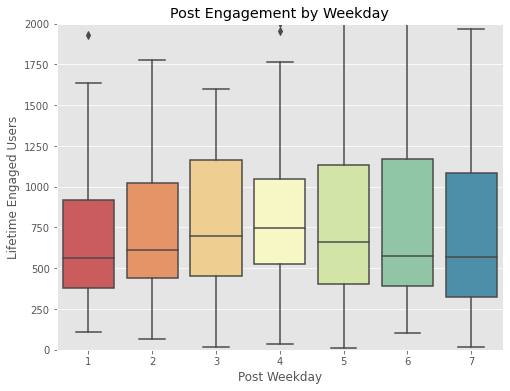

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Post Weekday'],y=data['Lifetime Engaged Users'],palette='Spectral')
plt.ylim(0,2000)
plt.title("Post Engagement by Weekday")

Text(0.5, 1.0, 'Post Engagement by Weekday')

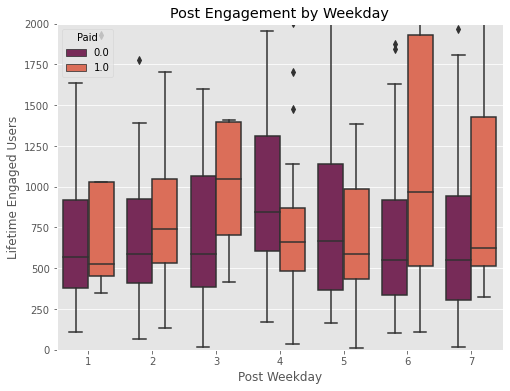

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Post Weekday'],y=data['Lifetime Engaged Users'],hue=data['Paid'],palette='rocket')
plt.ylim(0,2000)
plt.title("Post Engagement by Weekday")

Text(0.5, 1.0, 'Post likes by Weekday')

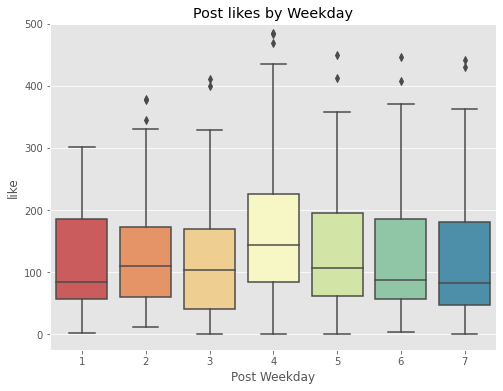

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Post Weekday'],y=data['like'],palette='Spectral')
plt.ylim(-25,500)
plt.title("Post likes by Weekday")

Text(0.5, 1.0, 'Post likes by Weekday')

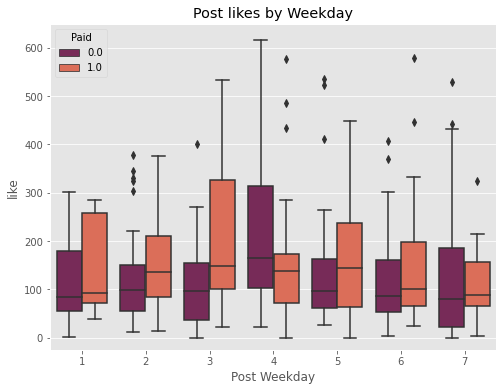

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Post Weekday'],y=data['like'],hue=data['Paid'],palette='rocket')
plt.ylim(-25,650)
plt.title("Post likes by Weekday")

Text(0.5, 1.0, 'Post likes by Type')

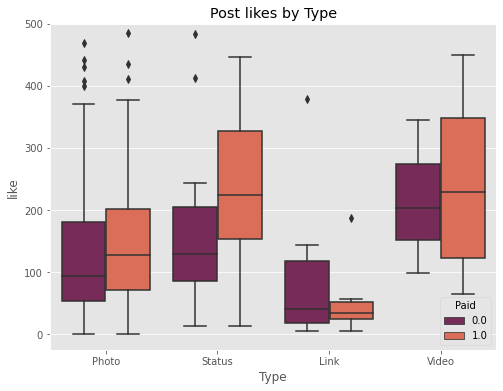

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Type'],y=data['like'],hue=data['Paid'],palette='rocket')
plt.ylim(-25,500)
plt.title("Post likes by Type")

(0.0, 500.0)

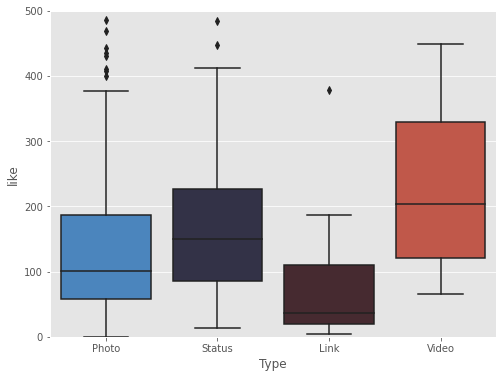

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Type'],y=data['like'],palette='icefire')
plt.ylim(0,500)

(0.0, 100.0)

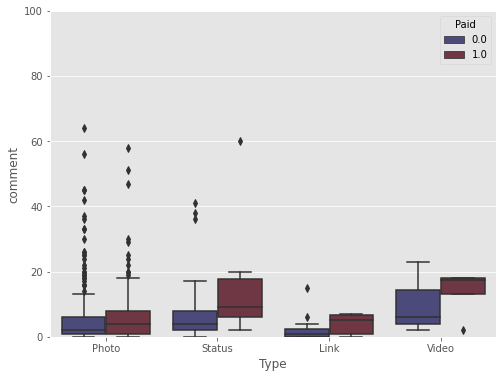

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Type'],y=data['comment'],hue=data['Paid'],palette='icefire')
plt.ylim(0,100)

(0.0, 500.0)

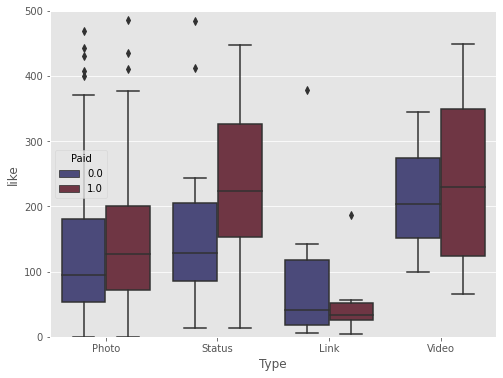

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Type'],y=data['like'],hue=data['Paid'],palette='icefire')
plt.ylim(0,500)

0.6543343852701147


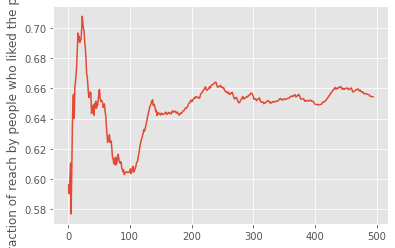

In [ ]:
a = data['Lifetime Post reach by people who like your Page']/data['Lifetime Post Total Reach']
new = []
for i in range(len(a)):
  new.append(np.mean(a[:i]))
plt.ylabel('Fraction of reach by people who liked the page')
plt.plot(new)
print(f"{np.mean(a)}")
     

0.7


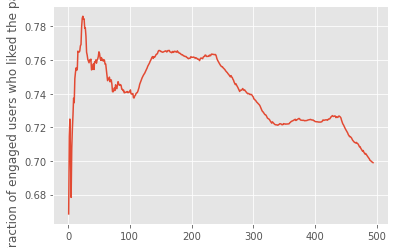

In [ ]:
a = data['Lifetime People who have liked your Page and engaged with your post']/data['Lifetime Engaged Users']

new = []
for i in range(len(a)):
  new.append(np.mean(a[:i]))

plt.ylabel('Fraction of engaged users who liked the page')

plt.plot(new)
print(f"{round(np.mean(a),2)}")
     

0.6992567097851073


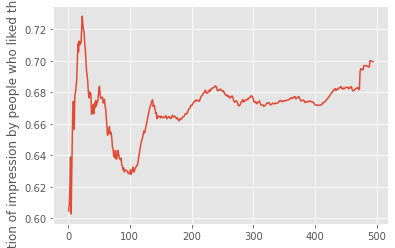

In [ ]:
a = data['Lifetime Post Impressions by people who have liked your Page']/data['Lifetime Post Total Impressions']
new = []
for i in range(len(a)):
  new.append(np.mean(a[:i]))
plt.ylabel('Fraction of impression by people who liked the page')
plt.plot(new)
print(f"{np.mean(a)}")

(0.0, 600.0)

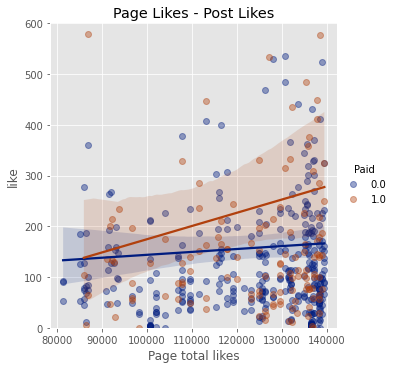

In [ ]:
sns.lmplot(x='Page total likes',y='like',
           hue='Paid',data=data,scatter_kws= {'alpha':0.4},palette='dark')
plt.title('Page Likes - Post Likes')
plt.ylim(0,600)

In [ ]:
data
     

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Weekday
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,Wednesday
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,Tuesday
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,Tuesday
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,Monday
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,Photo,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176,Saturday
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84,Saturday
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75,Thursday
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115,Thursday


#Relation between Like Comment and Share

(0.0, 2100.0)

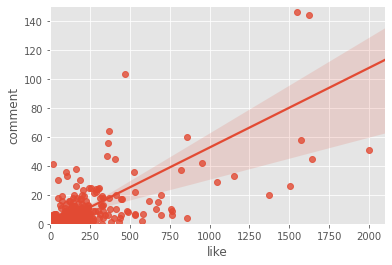

In [ ]:
sns.regplot(x="like",y="comment",data=data);
plt.ylim(0,150)
plt.xlim(0,2100)
     

(0.0, 220.0)

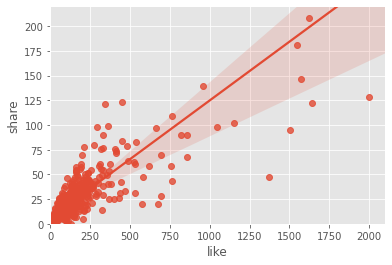

In [ ]:
sns.regplot(x="like",y="share",data=data);
plt.xlim(0,2100)
plt.ylim(0,220)

(0.0, 220.0)

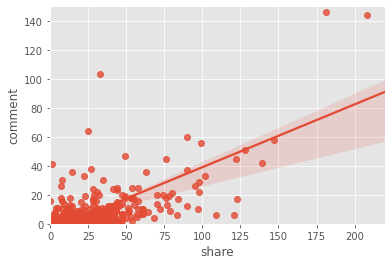

In [ ]:
sns.regplot(x="share",y="comment",data=data);
plt.ylim(0,150)
plt.xlim(0,220)

Text(0, 0.5, 'Fraction of reach by people who liked the page')

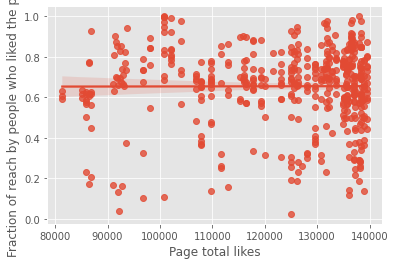

In [ ]:
a = data['Lifetime Post reach by people who like your Page']/data['Lifetime Post Total Reach']
sns.regplot(x="Page total likes",y=a, data=data);
plt.ylabel('Fraction of reach by people who liked the page')

Text(0, 0.5, 'Fraction of engaged users who liked the page')

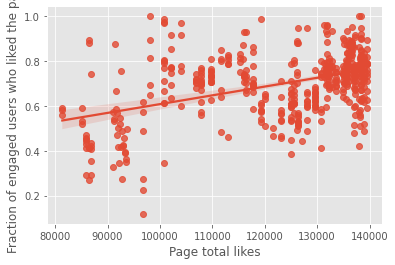

In [ ]:
a = data['Lifetime People who have liked your Page and engaged with your post']/data['Lifetime Engaged Users']
sns.regplot(x="Page total likes",y=a, data=data);
plt.ylabel('Fraction of engaged users who liked the page')

Text(0, 0.5, 'Fraction of impression by people who liked the page')

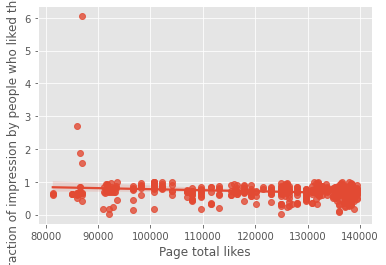

In [ ]:
a = data['Lifetime Post Impressions by people who have liked your Page']/data['Lifetime Post Total Impressions']
sns.regplot(x="Page total likes",y=a, data=data);
plt.ylabel('Fraction of impression by people who liked the page')

(0.0, 500.0)

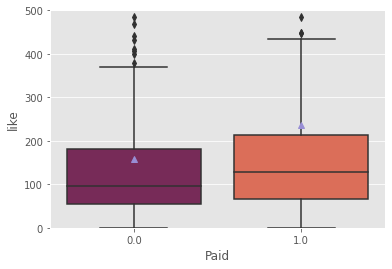

In [ ]:
sns.boxplot(x=data['Paid'],y=data['like'],showmeans=True, palette='rocket')
plt.ylim(0,500)


(0.0, 25.0)

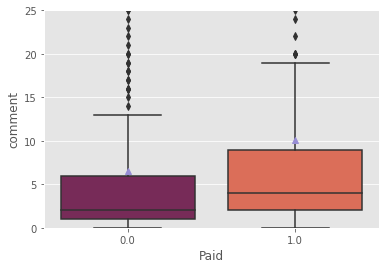

In [ ]:
sns.boxplot(x=data['Paid'],y=data['comment'],showmeans=True,palette='rocket')
plt.ylim(0,25)

(0.0, 100.0)

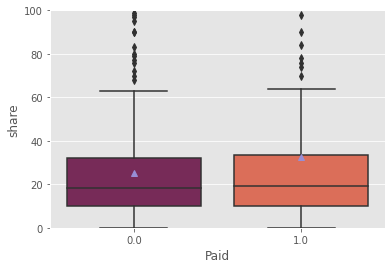

In [ ]:
sns.boxplot(x=data['Paid'],y=data['share'],showmeans=True,palette='rocket')
plt.ylim(0,100)

(0.0, 60000.0)

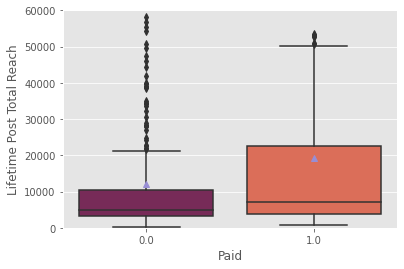

In [ ]:
sns.boxplot(x=data['Paid'],y=data['Lifetime Post Total Reach'],showmeans=True,palette='rocket')
plt.ylim(0,60000)

(0.0, 2500.0)

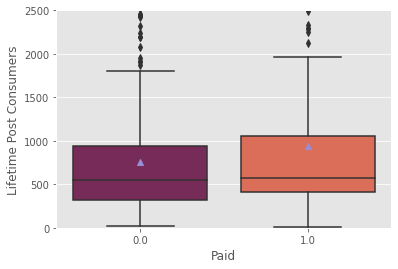

In [ ]:
sns.boxplot(x=data['Paid'],y=data['Lifetime Post Consumers'],showmeans=True,palette='rocket')
plt.ylim(0,2500)

(0.0, 100000.0)

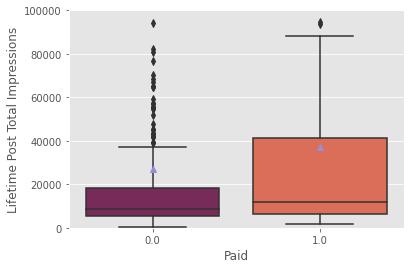

In [ ]:
sns.boxplot(x=data['Paid'],y=data['Lifetime Post Total Impressions'],showmeans=True,palette='rocket')
plt.ylim(0,100000)

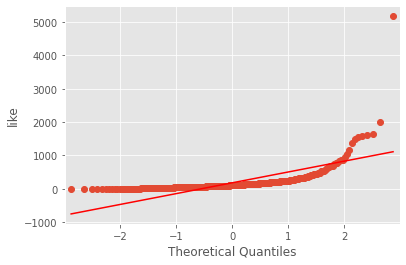

In [ ]:
qqplot(data['like'], line='s')
plt.ylabel('like')
plt.show()

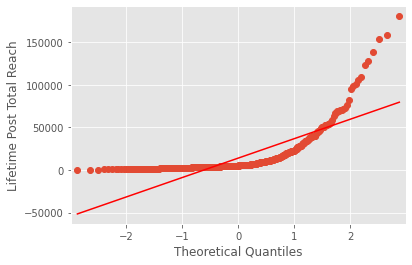

In [ ]:
qqplot(data['Lifetime Post Total Reach'], line='s')
plt.ylabel('Lifetime Post Total Reach')
plt.show()

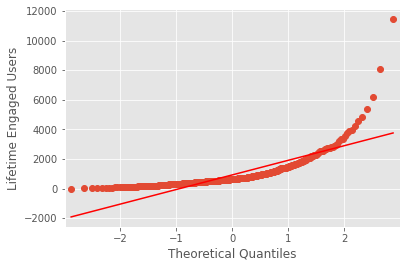

In [ ]:
qqplot(data['Lifetime Engaged Users'], line='s')
plt.ylabel('Lifetime Engaged Users')
plt.show()

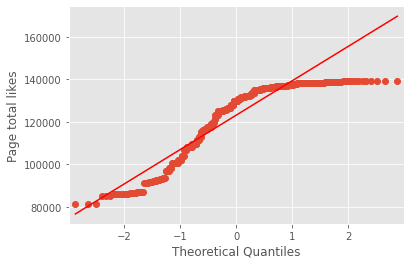

In [ ]:
qqplot(data['Page total likes'], line='s')
plt.ylabel('Page total likes')
plt.show()

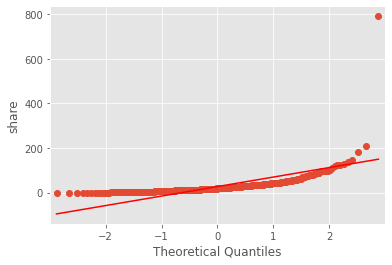

In [ ]:
qqplot(data['share'], line='s')
plt.ylabel('share')
plt.show()

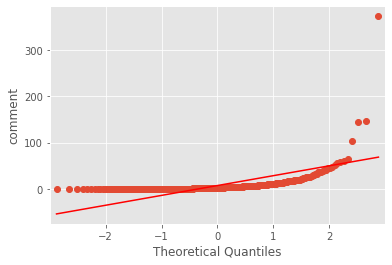

In [ ]:
qqplot(data['comment'], line='s')
plt.ylabel('comment')
plt.show()

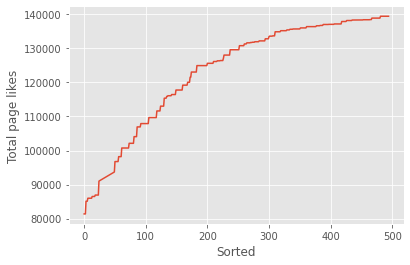

In [ ]:
data1 = data.sort_values('Page total likes')
data1 = data1.reset_index(drop=True)
plt.ylabel('Total page likes')
plt.xlabel('Sorted')
plt.plot(data1['Page total likes'])

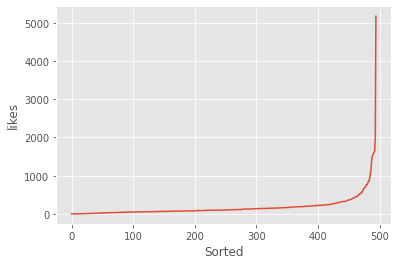

In [ ]:
data1 = data.sort_values('like')
data1 = data1.reset_index(drop=True)
a = data1['like']
plt.ylabel('likes')
plt.xlabel('Sorted')
plt.plot(a)

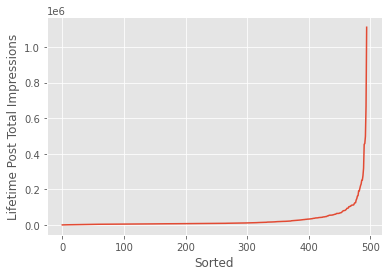

In [ ]:
data1 = data.sort_values('Lifetime Post Total Impressions')
data1 = data1.reset_index(drop=True)
a = data1['Lifetime Post Total Impressions']
plt.ylabel('Lifetime Post Total Impressions')
plt.xlabel('Sorted')
plt.plot(a)

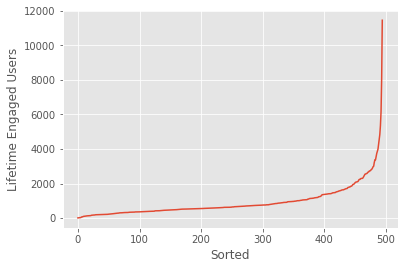

In [ ]:
data1 = data.sort_values('Lifetime Engaged Users')
data1 = data1.reset_index(drop=True)
a = data1['Lifetime Engaged Users']
plt.ylabel('Lifetime Engaged Users')
plt.xlabel('Sorted')
plt.plot(a)


In [ ]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Weekday
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,Wednesday
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,Tuesday
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,Tuesday
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,Monday
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,Monday


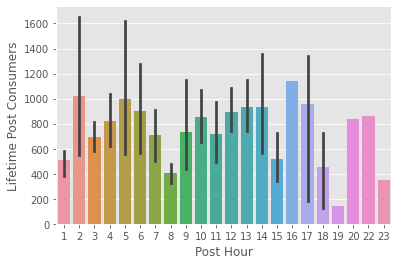

In [ ]:
ax = sns.barplot(x="Post Hour", y="Lifetime Post Consumers", data=data)

#Influence of hour on lifetime consumers

Text(0, 0.5, 'Life Time Post Consumers')

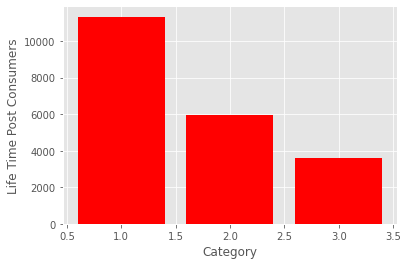

In [ ]:
plt.bar("Category","Lifetime Post Consumers", color="Red",data=data)
plt.xlabel("Category")
plt.ylabel("Life Time Post Consumers")


#Influence of category on life time post consumers

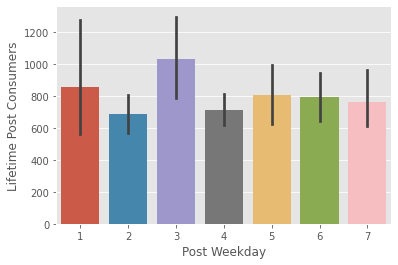

In [ ]:
ax = sns.barplot(x="Post Weekday", y="Lifetime Post Consumers", data=data)

#Influence of weekday on life time post consumers

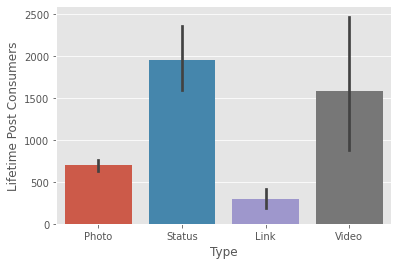

In [ ]:
ax = sns.barplot(x="Type", y="Lifetime Post Consumers", data=data)

#Influence of Type on life time post consumers

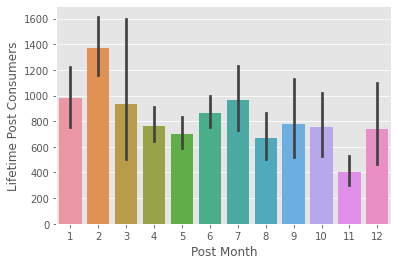

In [ ]:
ax = sns.barplot(x="Post Month", y="Lifetime Post Consumers", data=data)

# Influence of month on lifetime post consumers

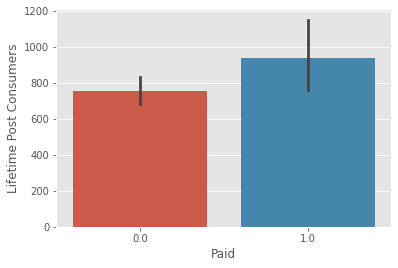

In [ ]:
ax = sns.barplot(x="Paid", y="Lifetime Post Consumers", data=data)

# Influence of paid on lifetime post time consumers

<ipython-input-123-744bdd963281>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['share'],bins=100,color='black',kde=True)


Text(0.5, 1.0, 'Share - Post')

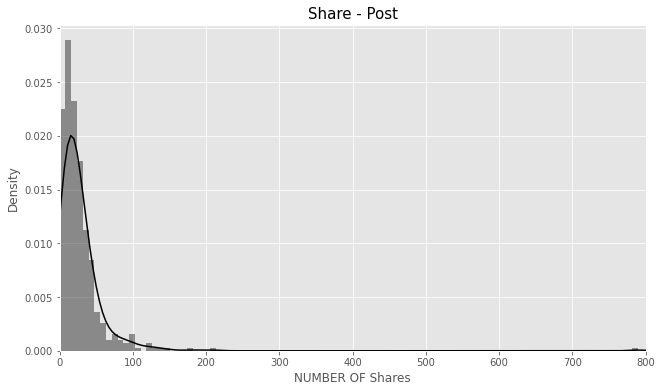

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['share'],bins=100,color='black',kde=True)
plt.xlim(0,800)
plt.xlabel("NUMBER OF Shares",fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.title('Share - Post',fontsize=15)

<ipython-input-124-11318ed92917>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Lifetime Post Consumers'],bins=100,color='black')


Text(0.5, 1.0, 'Lifetime Post Consumers')

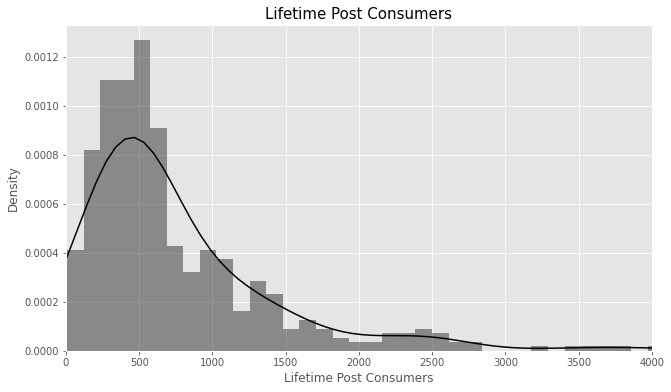

In [ ]:
plt.figure(figsize=(10.5,6))
sns.distplot(data['Lifetime Post Consumers'],bins=100,color='black')
plt.xlim(0,4000)
plt.title('Lifetime Post Consumers',fontsize=15)

Text(0.5, 0.98, 'Engagement Metrics vs. Lifetime Post Consumers')

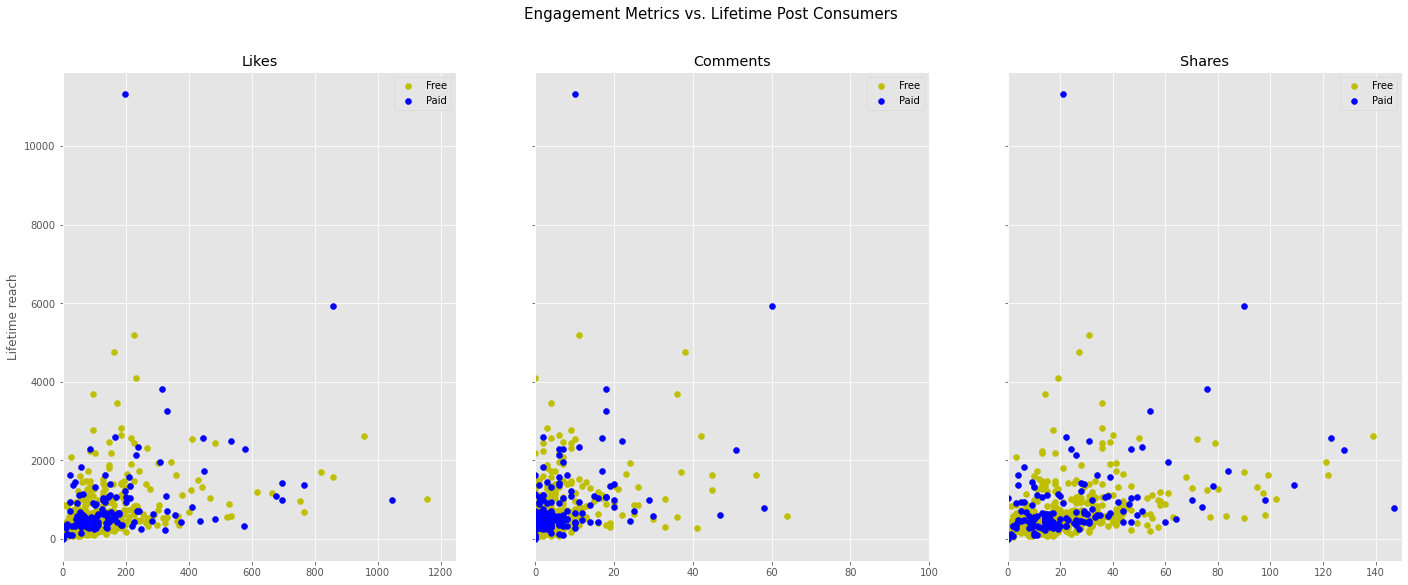

In [ ]:
fig, ax = plt.subplots(ncols=3,nrows=1,sharey=True,figsize=(24,9))

paid = data[data['Paid']==1]
free = data[data['Paid']==0]

ax[0].scatter(free['like'],free['Lifetime Post Consumers'],color='y')
ax[0].scatter(paid['like'],paid['Lifetime Post Consumers'],color='b')
ax[0].set_title('Likes')
ax[0].set_xlim(0,1250)
ax[0].legend(labels=['Free','Paid'])

ax[1].scatter(free['comment'],free['Lifetime Post Consumers'],color='y')
ax[1].scatter(paid['comment'],paid['Lifetime Post Consumers'],color='b')
ax[1].set_title('Comments')
ax[1].set_xlim(0,100)
ax[1].legend(labels=['Free','Paid'])

ax[2].scatter(free['share'],free['Lifetime Post Consumers'],color='y')
ax[2].scatter(paid['share'],paid['Lifetime Post Consumers'],color='b')
ax[2].set_title('Shares')
ax[2].set_xlim(0,150)
ax[2].legend(labels=['Free','Paid'])

ax[0].set_ylabel("Lifetime reach")

fig.suptitle('Engagement Metrics vs. Lifetime Post Consumers',fontsize=15)

(0.0, 5000.0)

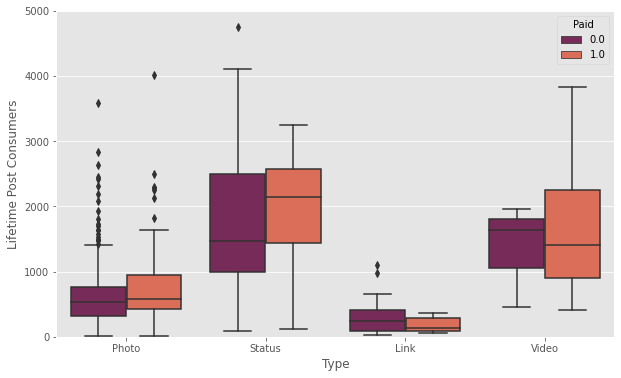

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Type'],y=data['Lifetime Post Consumers'],hue=data['Paid'],palette='rocket')
plt.ylim(0,5000)

#Engagement for Status > Video > photo > Link

(-300.0, 6500.0)

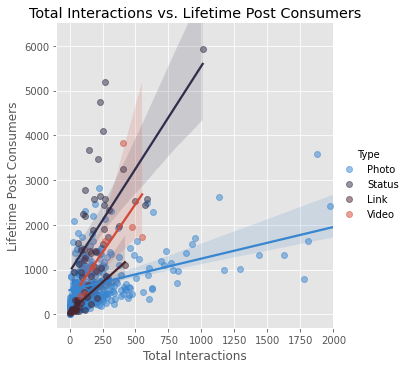

In [ ]:
sns.lmplot(x='Total Interactions',y='Lifetime Post Consumers',
           hue='Type',data=data,scatter_kws= {'alpha':0.5},palette='icefire')
plt.title('Total Interactions vs. Lifetime Post Consumers')
plt.xlim(-100,2000)
plt.ylim(-300,6500)

(-300.0, 6000.0)

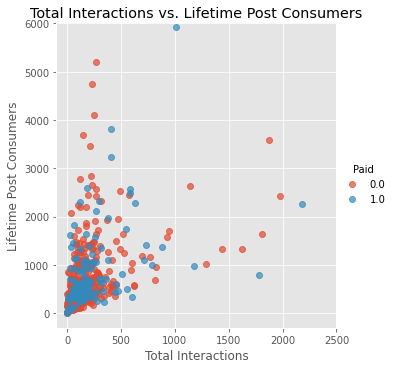

In [ ]:
plt.style.use('ggplot')
sns.lmplot(x='Total Interactions',y='Lifetime Post Consumers',
           hue='Paid',data=data,fit_reg=False,scatter_kws= {'alpha':0.7})
plt.title('Total Interactions vs. Lifetime Post Consumers')
plt.xlim(-100,2500)
plt.ylim(-300,6000)

(0.0, 500.0)

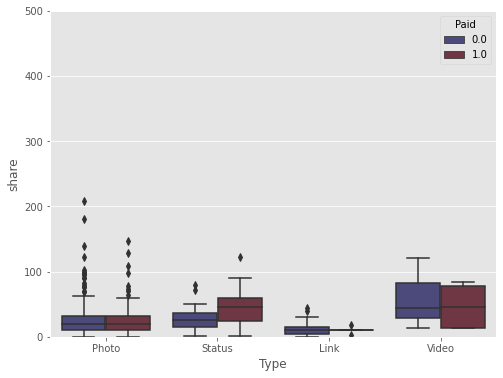

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Type'],y=data['share'],hue=data['Paid'],palette='icefire')
plt.ylim(0,500)

Text(0.5, 1.0, 'Shares in Weekday')

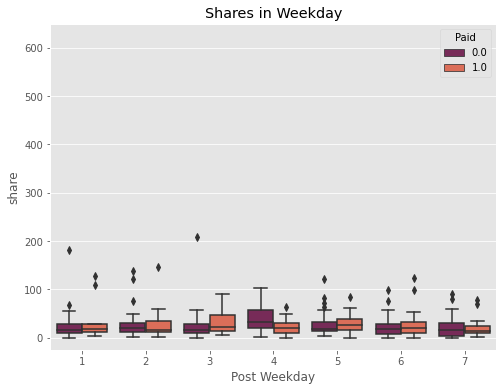

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Post Weekday'],y=data['share'],hue=data['Paid'],palette='rocket')
plt.ylim(-25,650)
plt.title("Shares in Weekday")

<Axes: ylabel='Page total likes'>

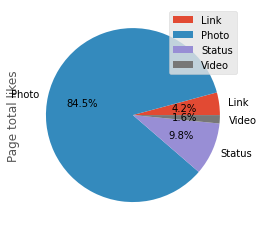

In [ ]:
data.groupby(['Type']).sum().plot(kind='pie', y='Page total likes', autopct='%1.1f%%')

<Axes: ylabel='Page total likes'>

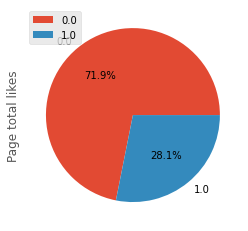

In [ ]:
data.groupby(['Paid']).sum().plot(kind='pie', y='Page total likes', autopct='%1.1f%%')

<Axes: ylabel='share'>

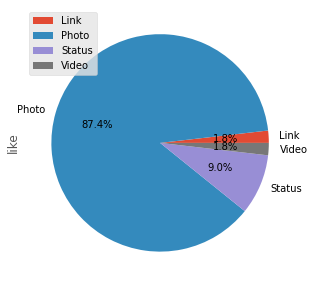

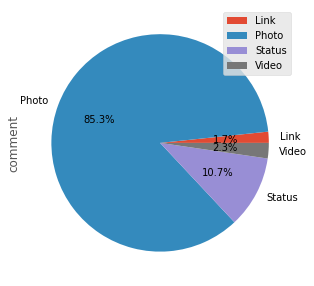

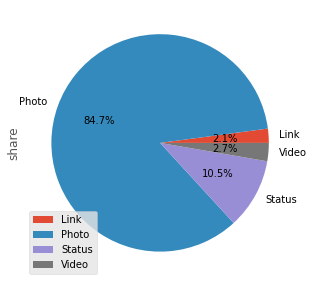

In [ ]:
data.groupby(['Type']).sum().plot(kind='pie', y='like', autopct='%1.1f%%', figsize=(10, 5))
data.groupby(['Type']).sum().plot(kind='pie', y='comment', autopct='%1.1f%%', figsize=(10, 5))
data.groupby(['Type']).sum().plot(kind='pie', y='share', autopct='%1.1f%%', figsize=(10, 5))

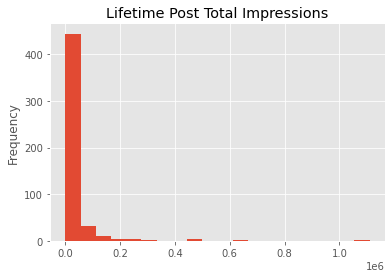

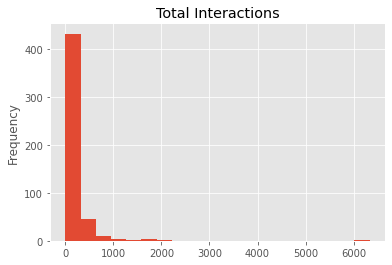

In [ ]:
for name in ['Lifetime Post Total Impressions','Total Interactions']:
    data_pca[name].plot(kind='hist',title=name,bins=20)
    plt.show()

<Axes: title={'center': 'Total Impressions based on Weekdays'}, ylabel='Post Weekday'>

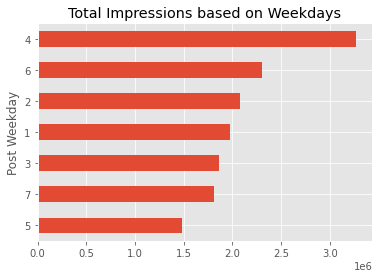

In [ ]:
data_count = data.groupby("Post Weekday")["Lifetime Post Total Impressions"].sum().sort_values()
data_count.plot(kind="barh",title='Total Impressions based on Weekdays')